In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from operator import itemgetter

import plotly.graph_objects as go
import plotly.express as px

from plotly.offline import init_notebook_mode, iplot

import cufflinks as cf
import squarify

In [3]:
BASE_PATH = '/content/drive/MyDrive/Facultate/year2-sem2/data-vis/project'

In [4]:
df = pd.read_csv(f'{BASE_PATH}/data/cleaned_housing.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerName,Date,Distance,Postcode,...,Bathroom,CarSpots,LandSize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1,202,157.0,1967,Yarra City Council,-37.799600,144.998400,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,...,1,0,156,79.0,1900,Yarra City Council,-37.807900,144.993400,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,...,2,0,134,150.0,1900,Yarra City Council,-37.809300,144.994400,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067,...,2,1,94,150.0,1967,Yarra City Council,-37.796900,144.996900,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067,...,1,2,120,142.0,2014,Yarra City Council,-37.807200,144.994100,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27242,Yarraville,13 Burns St,4,h,1480000,PI,Jas,24/02/2018,6.3,3013,...,1,3,593,142.0,1967,Maribyrnong City Council,-37.810530,144.884670,Western Metropolitan,6543
27243,Yarraville,29A Murray St,2,h,888000,SP,Sweeney,24/02/2018,6.3,3013,...,2,1,98,104.0,2018,Maribyrnong City Council,-37.815510,144.888260,Western Metropolitan,6543
27244,Yarraville,147A Severn St,2,t,705000,S,Jas,24/02/2018,6.3,3013,...,1,2,220,120.0,2000,Maribyrnong City Council,-37.822860,144.878560,Western Metropolitan,6543
27245,Yarraville,12/37 Stephen St,3,h,1140000,SP,hockingstuart,24/02/2018,6.3,3013,...,2,0,134,150.0,1967,Maribyrnong City Council,-37.816821,144.884105,Western Metropolitan,6543


In [5]:
def plot_float_column(df, column_name, xlabel, compact_labels=False):
  column = list(df[column_name])
  column_sorted = sorted(column)
  x = [i for i in range(1, len(column) + 1)]
  if compact_labels == True:
    plt.gca().yaxis.set_major_locator(plt.MaxNLocator(10))
  plt.plot(x, column_sorted)
  plt.xlabel("Houses")
  plt.ylabel(column_name)
  plt.show()

  if compact_labels == True:
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
  plt.hist(column_sorted, bins=30)
  plt.title(column_name)
  plt.xlabel(xlabel)
  plt.ylabel("House count")
  plt.show()

  print(df[column_name].describe())

  zero_value = sum(df[column_name] == 0)

  print()
  print(f"There are {zero_value} properties with a value of 0 for {column_name}")

In [6]:
def plot_text_column(df, column_name, title="", xlabel="", ylabel="", plot_first_ten=False, rotate_labels=False):
  # get a dictionary
  uniqueMap = {}
  for elem in df[column_name]:
    if elem not in uniqueMap:
      uniqueMap[elem] = 1
    else:
      uniqueMap[elem] += 1
  print(f'Found {len(uniqueMap)} values for column {column_name}')

  # sort descending
  uniqueList = [(key, value) for key, value in uniqueMap.items()]
  uniqueList.sort(key=lambda x: -x[1])

  # plot and check for too many
  if plot_first_ten:
    uniqueList = uniqueList[:10]
  strings = [x[0] for x in uniqueList]
  frequencies = [x[1] for x in uniqueList]
  
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  if rotate_labels:
    plt.xticks(rotation=45)
  ax.bar(strings, frequencies)
  if title != "":
    ax.set_title("")
  if xlabel != "":
    ax.set_xlabel(xlabel)
  if ylabel != "":
    ax.set_ylabel(ylabel)
  plt.show()

Found 344 values for column Suburb


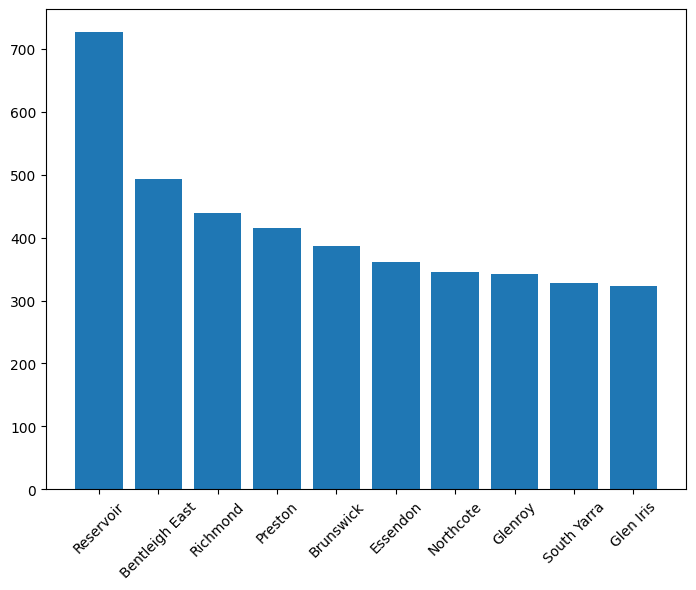

In [7]:
plot_text_column(df, 'Suburb', plot_first_ten=True, rotate_labels=True)

In [8]:
def plot_priciest_column(column_key, perform_sum=False, top_n_results=10):
  print(f"Plotting priciest entries for: {column_key}")
  result_dict = {}
  for entry in df[column_key].unique():
    result_dict[entry] = df[df[column_key] == entry].Price.sum() if perform_sum else df[df[column_key] == entry].Price.mean()
  result_dict = dict(sorted(result_dict.items(), key = itemgetter(1), reverse = True)[:top_n_results])

  names = list(result_dict.keys())
  values = list(result_dict.values())

  plt.xticks(rotation=45)
  plt.bar(range(len(result_dict)), values, tick_label=names)

Plotting priciest entries for: Suburb


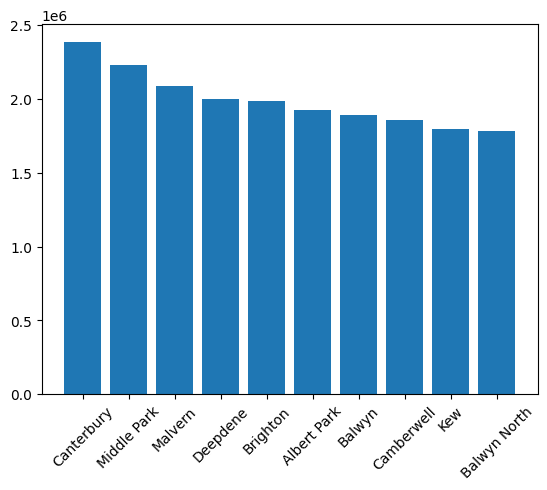

In [9]:
plot_priciest_column(column_key = 'Suburb')

Plotting priciest entries for: Rooms


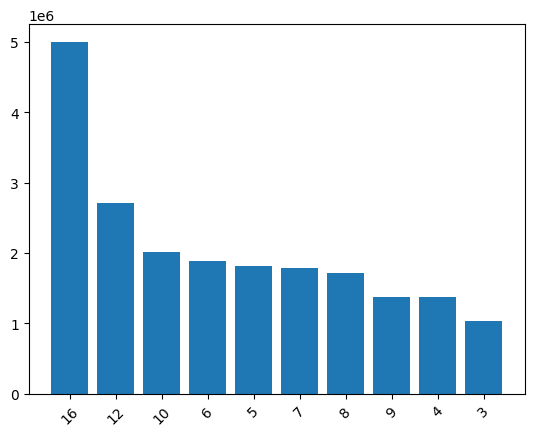

In [10]:
plot_priciest_column(column_key = 'Rooms')

Plotting priciest entries for: Bathroom


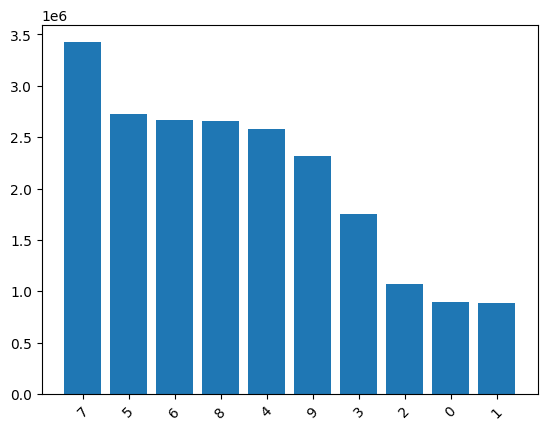

In [11]:
plot_priciest_column(column_key = 'Bathroom')

Plotting priciest entries for: Bedroom


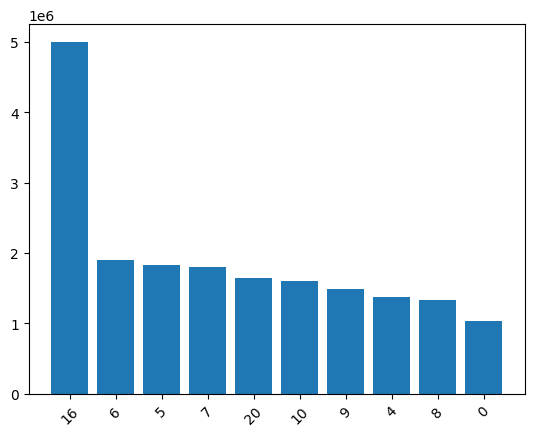

In [12]:
plot_priciest_column(column_key = 'Bedroom')

Plotting priciest entries for: SellerName


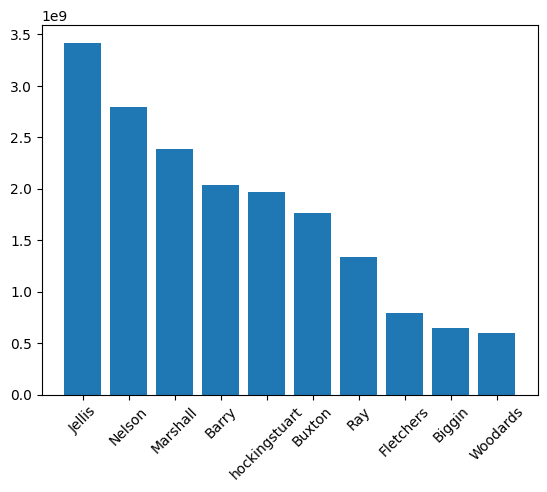

In [13]:
plot_priciest_column(column_key = 'SellerName', perform_sum=True)

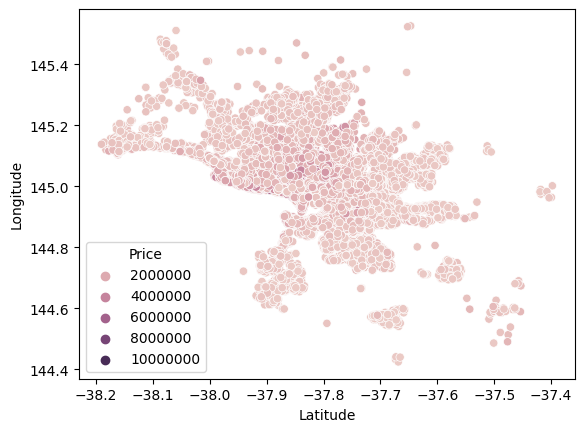

In [14]:
sns.scatterplot(data=df, x='Latitude', y='Longitude', hue='Price')
plt.show()

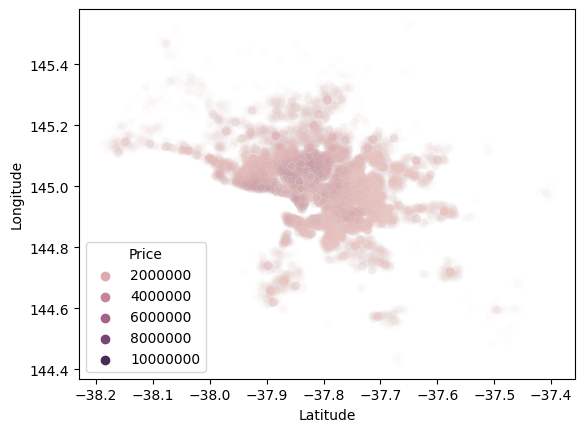

In [15]:
sns.scatterplot(data=df, x='Latitude', y='Longitude', hue='Price', alpha=0.03)
plt.show()

In [16]:
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", zoom=9, height=1000, width=1000, title="Property coordinates - Melbourne, Australia", color='Price')
fig.update_layout(mapbox_style='open-street-map')
fig.show()

In [17]:
fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', z='Price', zoom=9, height=1000, width=1000,mapbox_style='open-street-map')
 
fig

In [18]:
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", zoom=9, height=1000, width=1000, title="Property seller by color - Melbourne, Australia", color='SellerName')
fig.update_layout(mapbox_style='open-street-map')
fig.show()

# Plot Jellis selling locations

In [19]:
fig = px.scatter_mapbox(df[df.SellerName == 'Jellis'], lat="Latitude", lon="Longitude", zoom=9, height=1000, width=1000, title="Jellis's selling history - Melbourne, Australia")
fig.update_layout(mapbox_style='open-street-map')
fig.show()

# Plot Nelson selling history

In [20]:
# top 2 highest sellers don't sit in specific spot
fig = px.scatter_mapbox(df[df.SellerName == 'Nelson'], lat="Latitude", lon="Longitude", zoom=9, height=1000, width=1000, title="Nelson's selling history - Melbourne, Australia")
fig.update_layout(mapbox_style='open-street-map')
fig.show()

Plotting priciest entries for: YearBuilt


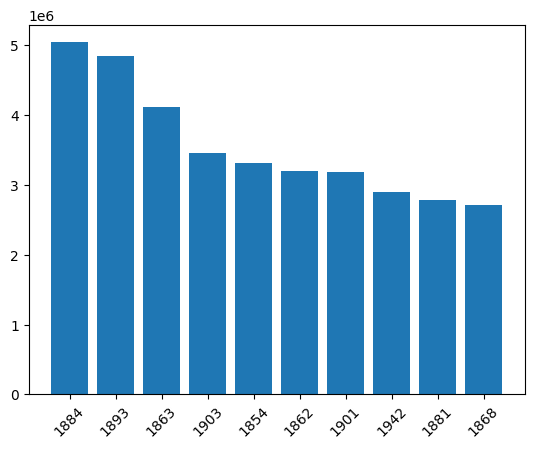

In [21]:
# How does the year a property is built in influence the price? Do people pay more for newer buildings or vintage flats?
plot_priciest_column('YearBuilt')

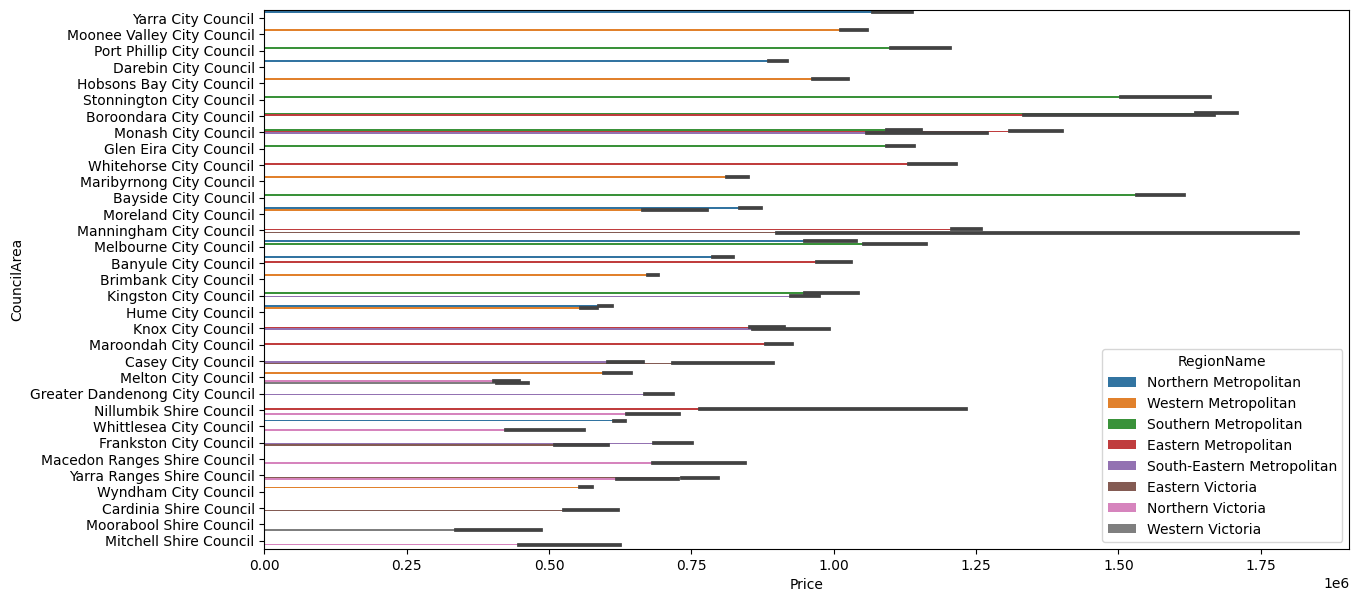

In [22]:
# Prices for each CouncilArea, with RegionName as hue
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(x ='Price', y="CouncilArea", hue="RegionName", data=df);
plt.show()

In [23]:
# Which month has the most sales?
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [24]:
total_sales = df['Price'].sum()

def compute_monthly_sales(df, total_sales=total_sales, year=None):
  sales_by_month = []
  for i in range(1, 13):
    current_month_sales = df['Price'].loc[df['Month'] == i].sum() / total_sales if year == None else df['Price'].loc[(df['Month'] == i) & (df['Year'] == year)].sum()
    sales_by_month.append(current_month_sales)
  return sales_by_month


  result_dict[entry] = df[df[column_key] == entry].Price.sum() if perform_sum else df[df[column_key] == entry].Price.mean()

monthly_sales = compute_monthly_sales(df, total_sales)

labels = ['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August', 'September', 
          'October', 'November', 'December']

pie_plot = go.Pie(labels=labels, values=monthly_sales, hoverinfo='label+percent',
               marker=dict(line=dict(color='#000000', width=2)))

data = [pie_plot]

layout = go.Layout(
    title="Sales by month"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [25]:
sales_2016 = compute_monthly_sales(df, total_sales=total_sales, year=2016)
sales_2017 = compute_monthly_sales(df, total_sales=total_sales, year=2017)
sales_2018 = compute_monthly_sales(df, total_sales=total_sales, year=2018)

plot_2016 = go.Scatter(x=sales_2016,y=labels,xaxis='x2',yaxis='y2',mode='markers',name='2016',
    marker=dict(
        line=dict(
            color='black',
            width=1.5,
        ),
        size=16,
    )
)


plot_2017 = go.Scatter(x=sales_2017,y=labels,xaxis='x2',yaxis='y2',mode='markers',name='2017',
    marker=dict(
        line=dict(
            color='black',
            width=1.5,
        ),
        size=16,
    )
)

plot_2018 = go.Scatter(x=sales_2018,y=labels,xaxis='x2',yaxis='y2',mode='markers',name='2018',
    marker=dict(
        line=dict(
            color='black',
            width=1.5,
        ),
        size=16,
    )
)

data = [plot_2016, plot_2017, plot_2018]

layout = go.Layout(
    title="Sales by each month for years 2016-2018",
    xaxis=dict(
        showgrid=False,
        showline=True
    ),
    width=1200,
    height=800
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [26]:
# Sales distribution for each season
df['Season'] = np.nan
lst = [df]

for column in lst:
    column.loc[(column['Month'] > 2) & (column['Month'] <= 5), 'Season'] = 'Spring'
    column.loc[(column['Month'] > 5) & (column['Month'] <= 8), 'Season'] = 'Summer'
    column.loc[(column['Month'] > 8) & (column['Month'] <= 11), 'Season'] = 'Autumn'
    column.loc[column['Month'] <= 2, 'Season'] = 'Winter'
    column.loc[column['Month'] == 12, 'Season'] = 'Winter'
    
df['Season'].value_counts()

Autumn    9745
Summer    7108
Spring    6188
Winter    4206
Name: Season, dtype: int64

In [27]:
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

In [28]:
def compute_season_sales_distrib_per_year_and_season(df, year):
  distribution = []
  for season in seasons:
    season_val = np.sum(df['Price'].loc[(df['Season'] == season) & (df['Year'] == year)].values)
    distribution.append(season_val)
  return distribution

In [29]:
distrib_2016 = compute_season_sales_distrib_per_year_and_season(df, 2016)
distrib_2017 = compute_season_sales_distrib_per_year_and_season(df, 2017)
distrib_2018 = compute_season_sales_distrib_per_year_and_season(df, 2018)

In [30]:
def compute_season_sales_distrib_overall(df):
  price_sum = df['Price'].sum()
  overall_distribs = []
  for season in seasons:
    season_val = (df['Price'].loc[df['Season'] == season].sum() / price_sum) * 100
    overall_distribs.append(season_val)
  return overall_distribs

In [31]:
overall_distribs = compute_season_sales_distrib_overall(df)

In [32]:
fig = {
  "data": [
    {
      "values": overall_distribs,
      "labels": seasons,
      "domain": {"x": [0, .25]},
      "name": "Overall sales",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
      {
      "values": distrib_2016,
      "labels": seasons,
      "textposition":"inside",
      "domain": {"x": [.26, .50]},
      "name": "2016",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
      {
      "values": distrib_2017,
      "labels": seasons,
      "textposition":"inside",
      "domain": {"x": [.51, .75]},
      "name": "2017",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": distrib_2018,
      "labels": seasons,
      "textposition":"inside",
      "domain": {"x": [.76, 1]},
      "name": "2018",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
     "layout": {
        "title":"Sales per season",
        "annotations": [
            {
                "showarrow": False,
                "text": "Overall sales",
                "x": 0.1,
                "y": 0.5
            },
            {
                "showarrow": False,
                "text": "2016 sales",
                "x": 0.38,
                "y": 0.5
            },
            {
                "showarrow": False,
                "text": "2017 sales",
                "x": 0.63,
                "y": 0.5
            },
            {
                "showarrow": False,
                "text": "2018 sales",
                "x": 0.91,
                "y": 0.5
            }
        ]
    }
}

iplot(fig)

In [33]:
# variable correlations
df_corr = df.corr()

trace = [go.Heatmap(z=df_corr.values.tolist(), 
                   x=df_corr.columns,
                   y=df_corr.columns)]

layout = go.Layout(title="Correlation heatmap", width=1000, height=1000)

fig = dict(data=trace, layout=layout)
iplot(fig)

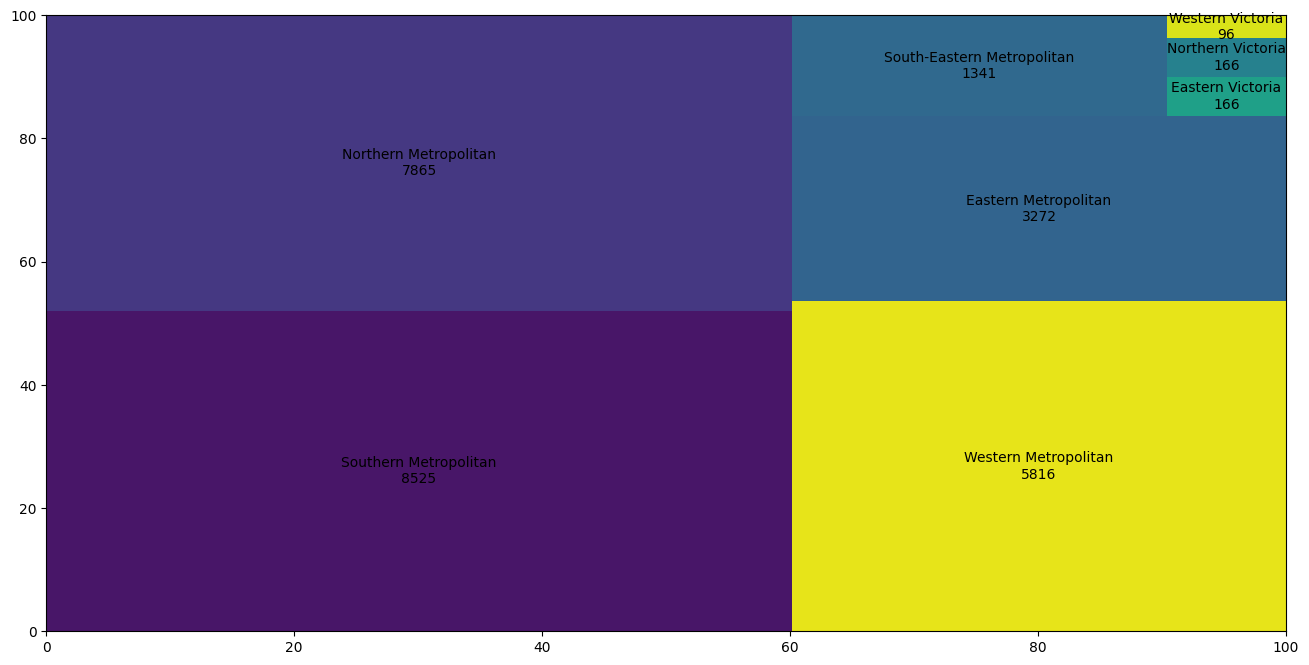

In [75]:
# Which region is most sought after?
values = df['RegionName'].value_counts().tolist()
labels = label=df['RegionName'].value_counts().index

labels = [f'{region}\n{str(sold)}' for region, sold in zip(labels, values)]

squarify.plot(label=labels, sizes=values)


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 8)
plt.axis("off")
plt.show()